In [1]:
import sys, os
sys.path.insert(0,os.path.abspath('..'))
from scripts.project_functions import *
sns.set_theme(style="whitegrid")


In [2]:
df = load_and_process(r"..\..\data\raw\database.csv")
df

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Agency Type,City,State,Year,Month,Incident,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,Municipal Police,Anchorage,Alaska,1980,1,1,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0
1,Municipal Police,Anchorage,Alaska,1980,3,1,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
2,Municipal Police,Anchorage,Alaska,1980,3,2,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,0
3,Municipal Police,Anchorage,Alaska,1980,4,1,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
4,Municipal Police,Anchorage,Alaska,1980,4,2,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631674,Sheriff,Park,Wyoming,2014,1,1,No,Male,30,White,Unknown,0,Unknown,Unknown,Handgun,0,0
631675,Sheriff,Sheridan,Wyoming,2014,6,1,Yes,Male,62,White,Male,57,White,Acquaintance,Handgun,0,0
631676,Municipal Police,Sheridan,Wyoming,2014,9,1,Yes,Female,0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,Daughter,Suffocation,0,0
631677,Sheriff,Sublette,Wyoming,2014,12,1,Yes,Male,55,White,Male,31,White,Stranger,Knife,0,1


In [3]:
df.describe(include=[object]).T

,count,unique,top,freq
Agency Type,631679,7,Municipal Police,488043
City,631679,1782,Los Angeles,43704
State,631679,51,California,97786
Month,631679,12,7,58090
Crime Solved,631679,2,Yes,444532
Victim Sex,631679,2,Male,489686
Victim Race,631679,4,White,317367
Perpetrator Sex,631679,3,Male,396212
Perpetrator Age,631679,191,0,207789
Perpetrator Race,631679,5,White,217026


## EDA
For this EDA I will be checking the weapon used with relation to the sex of the perpetrator to see if there are any interesting correlations.

In [25]:
df2 = weapon_df(df)

dfMale = df2.loc[lambda x: x['Perpetrator Sex'] != 'Female']
dfFemale = df2.loc[lambda x: x['Perpetrator Sex'] != 'Male']
df2


,Perpetrator Sex,Weapon,murder_count
0,Female,Blunt Object,5667
1,Female,Drowning,504
2,Female,Drugs,561
3,Female,Explosives,33
4,Female,Fall,29
5,Female,Fire,990
6,Female,Firearm,1277
7,Female,Gun,84
8,Female,Handgun,17027
9,Female,Knife,13700


Text(0.5, 1.0, 'Male')

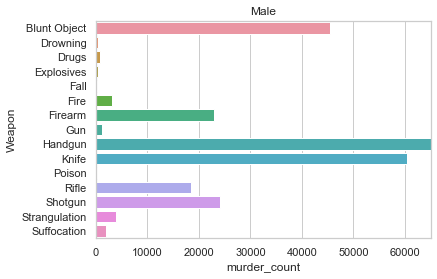

In [41]:
#MALE

plt.xlim(right=65000)
sns.barplot(data=dfMale,x='murder_count',y='Weapon').set_title("Male")

Text(0.5, 1.0, 'Female')

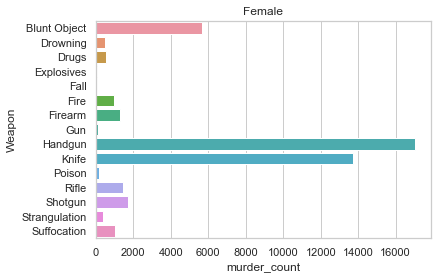

In [38]:
#FEMALE
sns.barplot(data=dfFemale,x='murder_count',y='Weapon').set_title("Female")

Text(0.5, 1.0, 'Male')

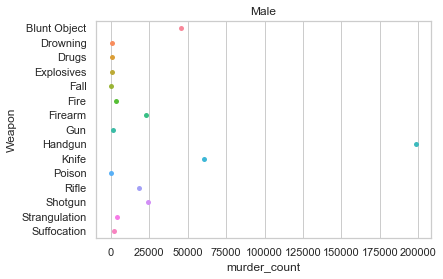

In [42]:
#MALE
sns.swarmplot(data=dfMale, x='murder_count',y='Weapon').set_title("Male")

Text(0.5, 1.0, 'Female')

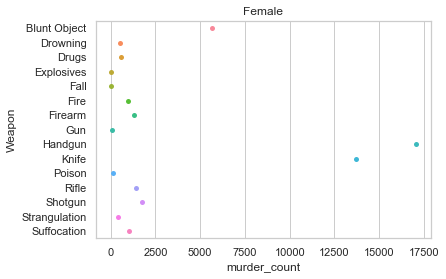

In [43]:
#FEMALE
sns.swarmplot(data=dfFemale, x='murder_count',y='Weapon').set_title("Female")

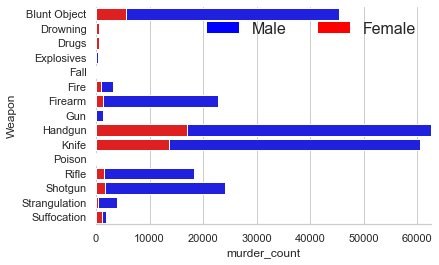

In [63]:
l = plt.legend([bottombar, topbar], ['Male', 'Female'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)
sns.despine(left=True)
bottom_plot.set_ylabel('Weapon')
bottom_plot.set_xlabel('murder_count')
plt.xlim(right=62500)


sns.barplot(y = dfMale.Weapon, x = dfMale.murder_count, color = "blue")
bottom_plot = sns.barplot(y = dfFemale.Weapon, x = dfFemale.murder_count, color = "red")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='blue',  edgecolor = 'none')


## Observations:

- Both Genders commit a surprising amount of murders with different types of firearms
- Females commit a proportionally larger amount of murders with knives as well as suffocation compared to males
- Handguns are the overwhelmingly prefferred choice for commiting murders
- Fire, as well as drowning are also surprising choices of murder employed more by females than males